In [56]:
import pandas as pd
import numpy as np
%run kNN.ipynb

import matplotlib.pyplot as plt
import os
#os.getcwd()

# 3.2.1

In [157]:
D2z = np.loadtxt("D2z.txt")

X = D2z[:,0:2]
y = D2z[:,2]

grid = np.array([[row, col] for row in np.arange(-2, 2, 0.1) for col in np.arange(-2, 2, 0.1)])

# predict for grid points
clf = kNN(k=1)
clf.fit(X,y)
grid_test = clf.predict(grid)["pred"]

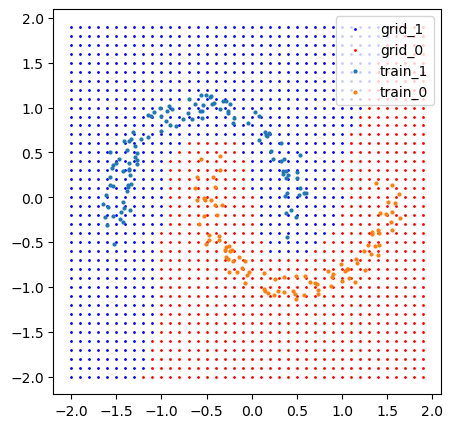

In [161]:
# reform grid and D2z into DataFrame
grid_df = pd.DataFrame(grid)
grid_df.columns = ("x0","x1")
grid_df["y"] = grid_test

D2z_df = pd.DataFrame(D2z)
D2z_df.columns = ("x0","x1","y")

grid1 = grid_df.loc[grid_df.y == 1]
grid0 = grid_df.loc[grid_df.y == 0]
D2z1 = D2z_df.loc[D2z_df.y == 1]
D2z0 = D2z_df.loc[D2z_df.y == 0]

# plot
plt.figure(figsize = (5, 5))
plt.scatter(grid1.x0, grid1.x1, color = "b", s=1,label = "grid_1")
plt.scatter(grid0.x0, grid0.x1, color = "r", s=1,label = "grid_0")

plt.scatter(D2z1.x0, D2z1.x1, marker = "o", s=4,label = "train_1")
plt.scatter(D2z0.x0, D2z0.x1, marker = "o", s=4,label = "train_0")
plt.legend()
# plt.xlabel("X1")
# plt.ylabel("X2")
# plt.title("ROC Curve")

# 3.2.2

In [2]:
def accuarcy(TP, FP, TN, FN):
#     n1 = length(TP)
#     n2 = length(FP)
#     n3 = length(TN)
#     n4 = length(FN)
#     return (n1+n3)/(n1+n2+n3+n4)
    return round((TP+TN)/(TP+FP+TN+FN),4)

def precision(TP, FP, TN, FN):
#     n1 = length(TP)
#     n2 = length(FP)
#     return n1/(n1+n2)
    return round(TP/(TP+FP),4)

def recall(TP, FP, TN, FN):
#     n1 = length(TP)
#     n4 = length(FN)
#     return n1/(n1+n4)
    return round(TP/(TP+FN),4)

In [17]:
emails = pd.read_csv("emails.csv", sep=",")
#emails

X = emails.loc[:,"the":"dry"]
X = X.to_numpy()
y = emails.loc[:,"Prediction"]
y = y.to_numpy()

In [4]:
clf = kNN(k=1)
acc1 = []
for i in range(5):
    test_idx = [idx for idx in range( i * 1000, (i + 1) * 1000)]
    X_test = X[test_idx,:]
    y_test = y[test_idx]
    X_train = np.delete(X, test_idx, axis=0)
    y_train = np.delete(y, test_idx, axis=0)

    clf.fit(X_train,y_train)
    X_test_clf = clf.predict(X_test)["pred"]
    
    y_compare = {'y_true': list(y_test), 'y_pred': X_test_clf}
    y_compare = pd.DataFrame(data=y_compare)

    TP = np.sum((y_compare['y_true']==1) & (y_compare['y_pred']==1))
    FP = np.sum((y_compare['y_true']==0) & (y_compare['y_pred']==1))
    FN = np.sum((y_compare['y_true']==1) & (y_compare['y_pred']==0))
    TN = np.sum((y_compare['y_true']==0) & (y_compare['y_pred']==0))
    
    acc1.append(accuarcy(TP, FP, TN, FN))
    
    print("Fold",i+1,":",
          accuarcy(TP, FP, TN, FN),
          precision(TP, FP, TN, FN),
          recall(TP, FP, TN, FN))

Fold 1 : 0.825 0.6536 0.8211
Fold 2 : 0.855 0.6897 0.8664
Fold 3 : 0.863 0.7221 0.8415
Fold 4 : 0.854 0.7216 0.8197
Fold 5 : 0.775 0.6052 0.7614


In [5]:
avg_acc1 = np.mean(acc1)
avg_acc1 # avg accuracy for 1NN

0.8344000000000001

# 3.2.3

In [46]:
%run LogisticReg.ipynb

In [39]:
X_logi = np.insert(X, 0, 1, axis=1) #insert 1 as column0
#X_logi

In [59]:
clf = LogiReg()
for i in range(5):
    test_idx = [idx for idx in range( i * 1000, (i + 1) * 1000)]
    X_test = X_logi[test_idx,:]
    y_test = y[test_idx]
    X_train = np.delete(X_logi, test_idx, axis=0)
    y_train = np.delete(y, test_idx, axis=0)

    clf.fit(X_train,y_train)
    y_result = clf.predict(X_test)
    X_test_clf = y_result["pred"]
    
    y_compare = {'y_true': list(y_test), 'y_pred': X_test_clf}
    y_compare = pd.DataFrame(data=y_compare)

    TP = np.sum((y_compare['y_true']==1) & (y_compare['y_pred']==1))
    FP = np.sum((y_compare['y_true']==0) & (y_compare['y_pred']==1))
    FN = np.sum((y_compare['y_true']==1) & (y_compare['y_pred']==0))
    TN = np.sum((y_compare['y_true']==0) & (y_compare['y_pred']==0))
    
    #for Q3.2.5
    if i == 1:
        Q5_logi = y_result["confi_posi"]
    
    print("Fold",i+1,":",
          accuarcy(TP, FP, TN, FN),
          precision(TP, FP, TN, FN),
          recall(TP, FP, TN, FN))

C:\Users\22838\AppData\Local\Temp\ipykernel_13632\3595032666.py:5: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Fold 1 : 0.908 0.9106 0.7509
Fold 2 : 0.775 0.5531 0.9783
Fold 3 : 0.894 0.8477 0.7641
Fold 4 : 0.868 0.875 0.6429
Fold 5 : 0.848 0.7852 0.6928


# 3.2.4

In [6]:
avg_acc = [avg_acc1]

for m in [3,5,7,10]:
    clf = kNN(k=m)
    acc = []
    for i in range(5):
        test_idx = [idx for idx in range( i * 1000, (i + 1) * 1000)]
        X_test = X[test_idx,:]
        y_test = y[test_idx]
        X_train = np.delete(X, test_idx, axis=0)
        y_train = np.delete(y, test_idx, axis=0)

        clf.fit(X_train,y_train)
        y_result = clf.predict(X_test)
        X_test_clf = y_result["pred"]

        y_compare = {'y_true': list(y_test), 'y_pred': X_test_clf}
        y_compare = pd.DataFrame(data=y_compare)

        num_total = len(y_test)
        TP = np.sum((y_compare['y_true']==1) & (y_compare['y_pred']==1))
#         FP = np.sum((y_compare['y_true']==0) & (y_compare['y_pred']==1))
#         FN = np.sum((y_compare['y_true']==1) & (y_compare['y_pred']==0))
        TN = np.sum((y_compare['y_true']==0) & (y_compare['y_pred']==0))

        accu=(TP+TN)/num_total # accuracy
        acc.append(accu)
        
        # checkpoint:
        print("k=", m, "CV round", i+1,"accuracy:",accu)
        
        #for Q3.2.5
        if (m == 5) &(i == 1):
            Q5_kNN = y_result["confi_posi"]      
    
    avg_acc.append(np.mean(acc))
    
avg_acc

3 0 accuracy: 0.846
3 1 accuracy: 0.85
3 2 accuracy: 0.856
3 3 accuracy: 0.88
3 4 accuracy: 0.773
5 0 accuracy: 0.837
5 1 accuracy: 0.852
5 2 accuracy: 0.871
5 3 accuracy: 0.869
5 4 accuracy: 0.78
7 0 accuracy: 0.837
7 1 accuracy: 0.861
7 2 accuracy: 0.875
7 3 accuracy: 0.874
7 4 accuracy: 0.779
10 0 accuracy: 0.849
10 1 accuracy: 0.865
10 2 accuracy: 0.875
10 3 accuracy: 0.88
10 4 accuracy: 0.781


[0.8344000000000001, 0.841, 0.8418000000000001, 0.8452, 0.85]

Text(0.5, 1.0, 'kNN 5-Fold Cross Validation')

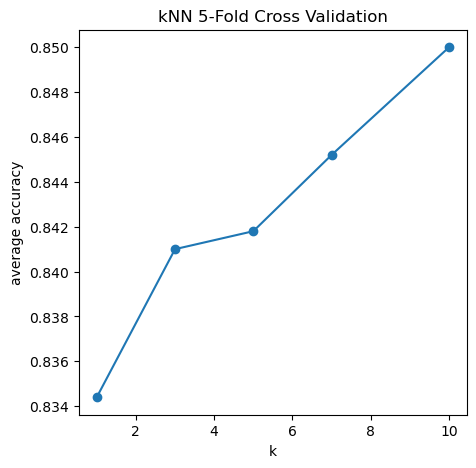

In [8]:
plt.figure(figsize = (5, 5))
plt.plot([1,3,5,7,10], avg_acc, "-o")
# ax.axhline(0, color = 'black')
# ax.axvline(0, color = 'black')
plt.xlabel("k")
plt.ylabel("average accuracy")
plt.title("kNN 5-Fold Cross Validation")

# 3.2.5

In [9]:
def ROC(true, c): 
    # true is y_true, c is confidence positive
    # return(FPR, TPR)
    if len(true)!=len(c):
        print("Wrong prediction length!")
        return
    
    num_neg = sum(val == 0 for val in true)
    num_pos = sum(val == 1 for val in true)
    
    # reorder y_true according to decreasing order of confi_positive 
    true_new = true[np.argsort(c)[::-1]]
    c_new = c[np.argsort(c)[::-1]]
    
    TP, FP = 0, 0
    last_TP = 0
    output = [[0,0]]
    for i in range(len(true_new)):
        if (i>0) & (c_new[i]!=c_new[i-1]) & (true_new[i]==0) & (TP > last_TP):
            output.append([FP/num_neg, TP/num_pos])
            last_TP = TP
        if (true_new[i]==1):
            TP +=1
        else:
            FP +=1
    output.append([FP/num_neg, TP/num_pos])
    return(output)

In [60]:
test_idx = [idx for idx in range( 1000, 2000)]
y_test = y[test_idx]

In [61]:
# use Fold 2: [1000:2000], 
# Q5.kNN, and Q5.logi are caluculated in Q3.2.4 and Q3.2.3
# kNN
curve1=ROC(y_test,np.array(Q5.kNN))
curve2=ROC(y_test,np.array(Q5_logi))

Text(0.5, 1.0, 'ROC Curve')

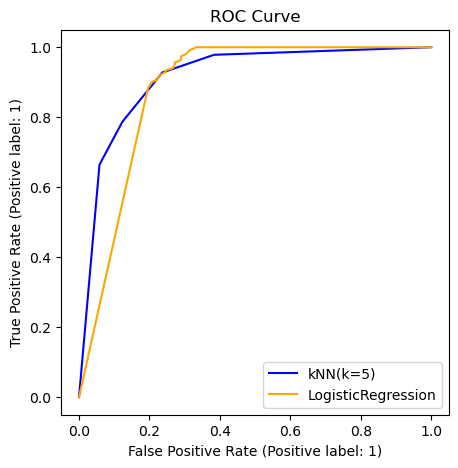

In [66]:
x1 = [i[0] for i in curve1]
y1 = [i[1] for i in curve1]

x2 = [i[0] for i in curve2]
y2 = [i[1] for i in curve2]
plt.figure(figsize = (5, 5))
plt.plot(x1,y1, color='blue', ls= '-',  label = 'kNN(k=5)')
plt.plot(x2,y2, color='orange', ls= '-',  label = 'LogisticRegression')
plt.legend(loc='best')
# ax.axhline(0, color = 'black')
# ax.axvline(0, color = 'black')
plt.xlabel("False Positive Rate (Positive label: 1)")
plt.ylabel("True Positive Rate (Positive label: 1)")
plt.title("ROC Curve")

In [54]:
curve1

[[0, 0],
 [0.058091286307053944, 0.6642599277978339],
 [0.12309820193637622, 0.7870036101083032],
 [0.23651452282157676, 0.927797833935018],
 [0.3831258644536653, 0.9783393501805054],
 [1.0, 1.0]]

In [65]:
curve2

[[0, 0],
 [0.19363762102351315, 0.8736462093862816],
 [0.1950207468879668, 0.8772563176895307],
 [0.19640387275242047, 0.8844765342960289],
 [0.1991701244813278, 0.8880866425992779],
 [0.20608575380359612, 0.8989169675090253],
 [0.21023513139695713, 0.9025270758122743],
 [0.22130013831258644, 0.9061371841155235],
 [0.22406639004149378, 0.9133574007220217],
 [0.2268326417704011, 0.9169675090252708],
 [0.23651452282157676, 0.924187725631769],
 [0.24343015214384509, 0.927797833935018],
 [0.24896265560165975, 0.9350180505415162],
 [0.2627939142461964, 0.9386281588447654],
 [0.26832641770401106, 0.9422382671480144],
 [0.2710926694329184, 0.9494584837545126],
 [0.27247579529737204, 0.9566787003610109],
 [0.2821576763485477, 0.9602888086642599],
 [0.28907330567081607, 0.9638989169675091],
 [0.29045643153526973, 0.9747292418772563],
 [0.30013831258644535, 0.9783393501805054],
 [0.31673582295988933, 0.9927797833935018],
 [0.326417704011065, 0.9963898916967509],
 [0.33195020746887965, 1.0],
 [1.